In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
df = pd.read_csv("train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
df["Sex"] = df["Sex"].map({"female": 1, "male": 0})

In [123]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Ticket
Cabin
Embarked


In [124]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category")

In [125]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [126]:
for label, content in df.items():
    if pd.api.types.is_categorical_dtype(content):
        print(label)

Name
Ticket
Cabin
Embarked


In [101]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age


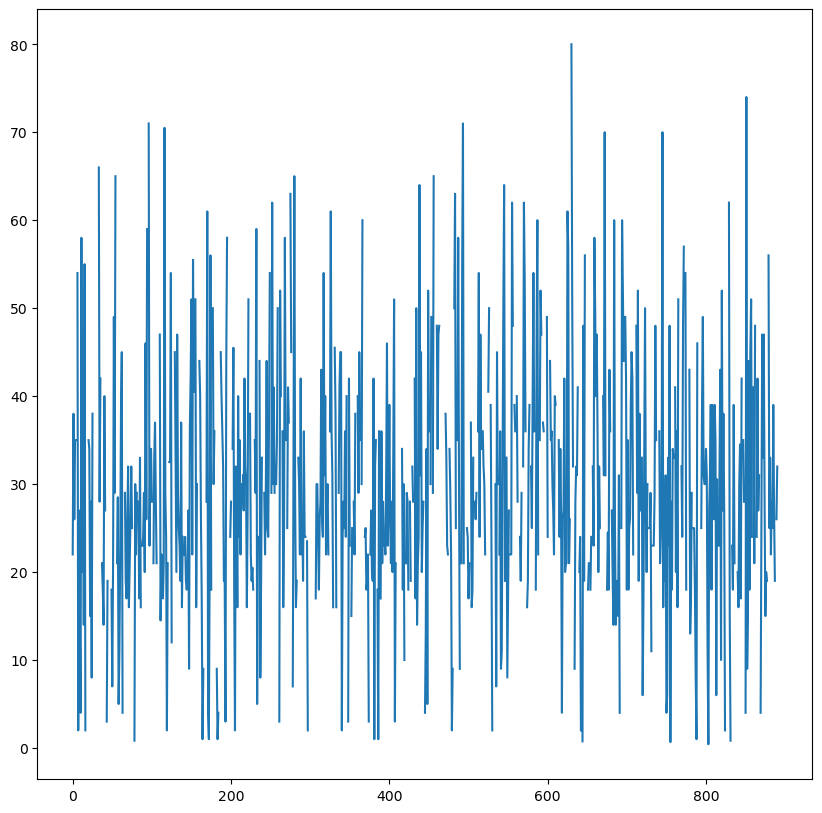

In [127]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(df.Age)

In [128]:
df[df.Age > df.Age.median()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
873,874,0,3,"Vander Cruyssen, Mr. Victor",0,47.0,0,0,345765,9.0000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,C
881,882,0,3,"Markun, Mr. Johann",0,33.0,0,0,349257,7.8958,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,NaN,Q


In [129]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label] = content.fillna(content.median())

In [130]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [106]:
df.Cabin.head(5)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: category
Categories (147, object): ['A10', 'A14', 'A16', 'A19', ..., 'F38', 'F4', 'G6', 'T']

In [107]:
df["Fare"] = round(df.Fare).astype(int)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    int32   
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(4), float64(1), int32(1), int64(6)
memory usage: 124.5 KB


In [131]:
df["Age"] = round(df.Age).astype(int)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    int32   
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(4), int32(2), int64(6)
memory usage: 121.0 KB


In [132]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
            df[label+"is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Name                891 non-null    int16  
 4   Sex                 891 non-null    int64  
 5   Age                 891 non-null    int32  
 6   SibSp               891 non-null    int64  
 7   Parch               891 non-null    int64  
 8   Ticket              891 non-null    int16  
 9   Fare                891 non-null    float64
 10  Cabin               891 non-null    int16  
 11  Embarked            891 non-null    int8   
 12  Nameis_missing      891 non-null    bool   
 13  Ticketis_missing    891 non-null    bool   
 14  Cabinis_missing     891 non-null    bool   
 15  Embarkedis_missing  891 non-null    bool   
dtypes: bool(

In [134]:
df.isna().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin                 0
Embarked              0
Nameis_missing        0
Ticketis_missing      0
Cabinis_missing       0
Embarkedis_missing    0
dtype: int64

In [114]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nameis_missing,Ticketis_missing,Cabinis_missing,Embarkedis_missing
0,1,0,3,109,0,22,1,0,524,7,0,3,False,False,True,False
1,2,1,1,191,1,38,1,0,597,71,82,1,False,False,False,False
2,3,1,3,354,1,26,0,0,670,8,0,3,False,False,True,False
3,4,1,1,273,1,35,1,0,50,53,56,3,False,False,False,False
4,5,0,3,16,0,35,0,0,473,8,0,3,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,549,0,27,0,0,102,13,0,3,False,False,True,False
887,888,1,1,304,1,19,0,0,15,30,31,3,False,False,False,False
888,889,0,3,414,1,28,1,2,676,23,0,3,False,False,True,False
889,890,1,1,82,0,26,0,0,9,30,61,1,False,False,False,False


In [115]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nameis_missing,Ticketis_missing,Cabinis_missing,Embarkedis_missing
0,1,0,3,109,0,22,1,0,524,7,0,3,False,False,True,False
1,2,1,1,191,1,38,1,0,597,71,82,1,False,False,False,False
2,3,1,3,354,1,26,0,0,670,8,0,3,False,False,True,False
3,4,1,1,273,1,35,1,0,50,53,56,3,False,False,False,False
4,5,0,3,16,0,35,0,0,473,8,0,3,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,549,0,27,0,0,102,13,0,3,False,False,True,False
887,888,1,1,304,1,19,0,0,15,30,31,3,False,False,False,False
888,889,0,3,414,1,28,1,2,676,23,0,3,False,False,True,False
889,890,1,1,82,0,26,0,0,9,30,61,1,False,False,False,False


In [116]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nameis_missing,Ticketis_missing,Cabinis_missing,Embarkedis_missing
0,1,0,3,109,0,22,1,0,524,7,0,3,False,False,True,False
1,2,1,1,191,1,38,1,0,597,71,82,1,False,False,False,False
2,3,1,3,354,1,26,0,0,670,8,0,3,False,False,True,False
3,4,1,1,273,1,35,1,0,50,53,56,3,False,False,False,False
4,5,0,3,16,0,35,0,0,473,8,0,3,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,549,0,27,0,0,102,13,0,3,False,False,True,False
887,888,1,1,304,1,19,0,0,15,30,31,3,False,False,False,False
888,889,0,3,414,1,28,1,2,676,23,0,3,False,False,True,False
889,890,1,1,82,0,26,0,0,9,30,61,1,False,False,False,False


In [118]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nameis_missing,Ticketis_missing,Cabinis_missing,Embarkedis_missing
0,1,0,3,109,0,22,1,0,524,7,missing,3,False,False,True,False
1,2,1,1,191,1,38,1,0,597,71,NaN,1,False,False,False,False
2,3,1,3,354,1,26,0,0,670,8,missing,3,False,False,True,False
3,4,1,1,273,1,35,1,0,50,53,NaN,3,False,False,False,False
4,5,0,3,16,0,35,0,0,473,8,missing,3,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,549,0,27,0,0,102,13,missing,3,False,False,True,False
887,888,1,1,304,1,19,0,0,15,30,NaN,3,False,False,False,False
888,889,0,3,414,1,28,1,2,676,23,missing,3,False,False,True,False
889,890,1,1,82,0,26,0,0,9,30,NaN,1,False,False,False,False


<Axes: xlabel='Age', ylabel='Survived'>

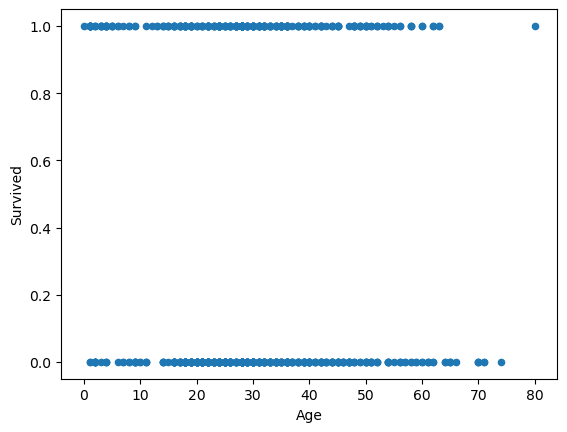

In [135]:
df.plot(kind="scatter",
        x = 'Age',
        y = 'Survived')

In [88]:
%%time
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

CPU times: total: 141 ms
Wall time: 145 ms


RandomForestClassifier()

In [89]:
df_test = pd.read_csv("test.csv")

In [91]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [136]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nameis_missing,Ticketis_missing,Cabinis_missing,Embarkedis_missing
0,1,3,109,0,22,1,0,524,7,0,3,False,False,True,False
1,2,1,191,1,38,1,0,597,71,82,1,False,False,False,False
2,3,3,354,1,26,0,0,670,8,0,3,False,False,True,False
3,4,1,273,1,35,1,0,50,53,56,3,False,False,False,False
4,5,3,16,0,35,0,0,473,8,0,3,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,549,0,27,0,0,102,13,0,3,False,False,True,False
887,888,1,304,1,19,0,0,15,30,31,3,False,False,False,False
888,889,3,414,1,28,1,2,676,23,0,3,False,False,True,False
889,890,1,82,0,26,0,0,9,30,61,1,False,False,False,False


In [137]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)

In [138]:
%%time
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

CPU times: total: 172 ms
Wall time: 154 ms


RandomForestClassifier()

In [139]:
model.score(X_val,y_val)

0.8435754189944135

In [278]:
models = {"Logistic Regression" : LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
def fit_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [280]:
model_scores = fit_score(models=models,
                         X_train = X_train,
                         y_train = y_train,
                         X_test = X_val,
                         y_test = y_val)

C:\Users\DELL\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [281]:
model_scores

{'Logistic Regression': 0.8156424581005587,
 'KNN': 0.6759776536312849,
 'Random Forest': 0.8547486033519553}

In [146]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.815642,0.675978,0.854749


(array([0]), [Text(0, 0, 'accuracy')])

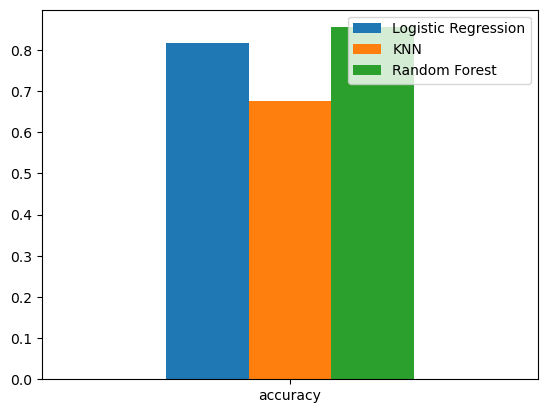

In [147]:
model_compare.plot(kind="bar");
plt.xticks(rotation=0)

In [149]:
train_scores = []
test_score = []

k_range = range(1,21)
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_val,y_val))
train_scores,test_score

([1.0,
  0.8075842696629213,
  0.8160112359550562,
  0.7429775280898876,
  0.7457865168539326,
  0.726123595505618,
  0.723314606741573,
  0.7050561797752809,
  0.7191011235955056,
  0.6938202247191011,
  0.7050561797752809,
  0.6938202247191011,
  0.6882022471910112,
  0.6896067415730337,
  0.699438202247191,
  0.6853932584269663,
  0.6924157303370787,
  0.6882022471910112,
  0.6952247191011236,
  0.6853932584269663],
 [0.5754189944134078,
  0.5977653631284916,
  0.6368715083798883,
  0.659217877094972,
  0.6759776536312849,
  0.6759776536312849,
  0.6815642458100558,
  0.6703910614525139,
  0.6983240223463687,
  0.6983240223463687,
  0.6871508379888268,
  0.659217877094972,
  0.664804469273743,
  0.6536312849162011,
  0.659217877094972,
  0.6424581005586593,
  0.6424581005586593,
  0.6368715083798883,
  0.659217877094972,
  0.659217877094972])

Max score in test: 69.83%
Max socre in train: 100.00%


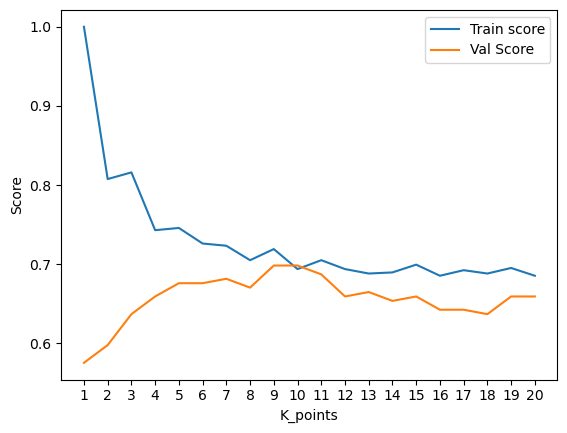

In [151]:
plt.plot(k_range,train_scores,label="Train score")
plt.plot(k_range,test_score,label="Val Score")
plt.xlabel("K_points")
plt.ylabel("Score")
plt.xticks(range(1,21,1))
plt.legend();
print(f"Max score in test: {max(test_score)*100:.2f}%")
print(f"Max socre in train: {max(train_scores)*100:.2f}%")

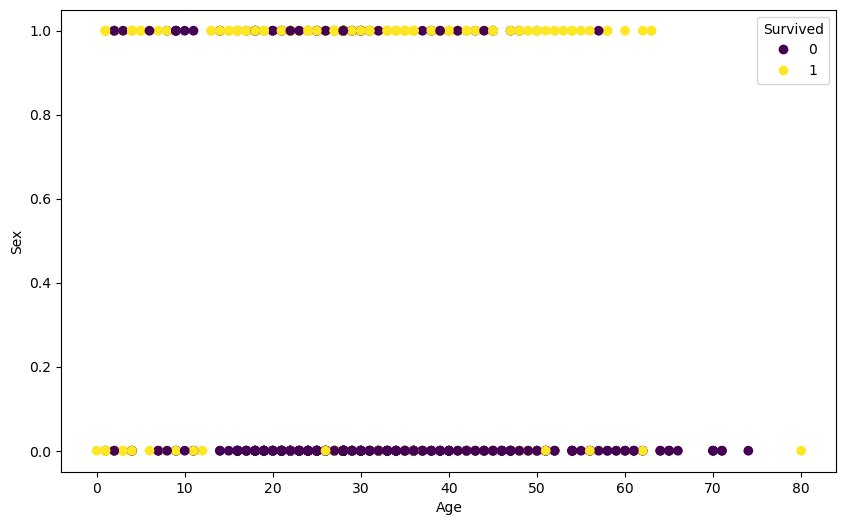

In [153]:
fig,ax = plt.subplots(figsize = (10,6))

# Plot the data
scatter = ax.scatter(x = df.Age,
                     y = df.Sex,
                     c = df.Survived);
ax.set(
       xlabel="Age",
       ylabel="Sex");
ax.legend(*scatter.legend_elements(),title = "Survived")

In [157]:
rs_log_reg.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [158]:
rs_log_reg.score(X_val,y_val)

0.8268156424581006

In [165]:
from sklearn.model_selection import GridSearchCV
rf_gird = {"n_estimators":[50,100],
           "max_depth":[None,3,5,10],
           "min_samples_split":[4,8],
           "min_samples_leaf":[4,8]}
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression 
rs_log_reg = GridSearchCV(estimator = RandomForestClassifier(),
                                param_grid=  rf_gird,
                                cv = 5,
                                verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [4, 8],
                         'min_samples_split': [4, 8],
                         'n_estimators': [50, 100]},
             verbose=True)

In [166]:
rs_log_reg.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 100}

In [167]:
rs_log_reg.score(X_val,y_val)

0.8379888268156425

In [168]:
model.score(X_val,y_val)

0.8435754189944135

In [176]:
rf_gird = {"n_estimators":[150,200],
           "max_depth":[None],
           "min_samples_split":[2,4],
           "min_samples_leaf":[4,8],
           }
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression 
rs_log_reg = GridSearchCV(estimator = RandomForestClassifier(),
                                param_grid=  rf_gird,
                                cv = 5,
                                verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'min_samples_leaf': [4, 8],
                         'min_samples_split': [2, 4],
                         'n_estimators': [150, 200]},
             verbose=True)

In [177]:
rs_log_reg.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 200}

In [178]:
rs_log_reg.score(X_val,y_val)

0.8268156424581006

In [253]:
df_test = pd.read_csv("test.csv")


In [228]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [208]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [213]:
df_missing_values = df_test[df_test.isnull().any(axis=1)]
df_missing_values

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [200]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test[label] = content.fillna(content.median())

In [201]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [254]:
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category")

In [203]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    category
 3   Sex          418 non-null    category
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    category
 8   Fare         418 non-null    float64 
 9   Cabin        91 non-null     category
 10  Embarked     418 non-null    category
dtypes: category(5), float64(2), int64(4)
memory usage: 55.8 KB


In [204]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    category
 3   Sex          418 non-null    category
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    category
 8   Fare         418 non-null    float64 
 9   Cabin        91 non-null     category
 10  Embarked     418 non-null    category
dtypes: category(5), float64(2), int64(4)
memory usage: 55.8 KB


In [193]:
df_test.Fare

0        8.0
1        7.0
2       10.0
3        9.0
4       12.0
       ...  
413      8.0
414    109.0
415      7.0
416      8.0
417     22.0
Name: Fare, Length: 418, dtype: float64

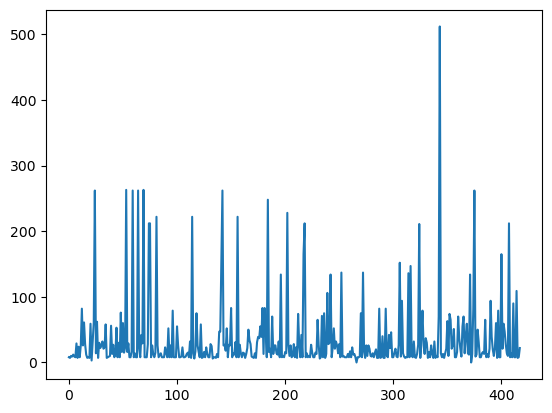

In [194]:
plt.plot(df_test.Fare)

In [196]:
df_test[df_test.Fare == 0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,27.0,0,0,112051,0.0,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S


In [205]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [255]:
for label, content in df_test.items():
    if pd.api.types.is_categorical_dtype(content):
            df_test[label+"is_missing"] = pd.isnull(content)
            df_test[label] = pd.Categorical(content).codes + 1

In [231]:
df_test.isna().sum()

PassengerId            0
Pclass                 0
Name                   0
Sex                    0
Age                   86
SibSp                  0
Parch                  0
Ticket                 0
Fare                   1
Cabin                  0
Embarked               0
Nameis_missing         0
Sexis_missing          0
Ticketis_missing       0
Cabinis_missing        0
Embarkedis_missing     0
dtype: int64

In [221]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         418 non-null    int64  
 1   Pclass              418 non-null    int64  
 2   Name                418 non-null    int16  
 3   Sex                 418 non-null    int8   
 4   Age                 332 non-null    float64
 5   SibSp               418 non-null    int64  
 6   Parch               418 non-null    int64  
 7   Ticket              418 non-null    int16  
 8   Fare                417 non-null    float64
 9   Cabin               418 non-null    int8   
 10  Embarked            418 non-null    int8   
 11  Nameis_missing      418 non-null    bool   
 12  Sexis_missing       418 non-null    bool   
 13  Ticketis_missing    418 non-null    bool   
 14  Cabinis_missing     418 non-null    bool   
 15  Embarkedis_missing  418 non-null    bool   
dtypes: bool(

In [256]:
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].median())

In [224]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         418 non-null    int64  
 1   Pclass              418 non-null    int64  
 2   Name                418 non-null    int16  
 3   Sex                 418 non-null    int8   
 4   Age                 418 non-null    float64
 5   SibSp               418 non-null    int64  
 6   Parch               418 non-null    int64  
 7   Ticket              418 non-null    int16  
 8   Fare                417 non-null    float64
 9   Cabin               418 non-null    int8   
 10  Embarked            418 non-null    int8   
 11  Nameis_missing      418 non-null    bool   
 12  Sexis_missing       418 non-null    bool   
 13  Ticketis_missing    418 non-null    bool   
 14  Cabinis_missing     418 non-null    bool   
 15  Embarkedis_missing  418 non-null    bool   
dtypes: bool(

In [235]:
df_test.isna().sum()

PassengerId           0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  1
Cabin                 0
Embarked              0
Nameis_missing        0
Sexis_missing         0
Ticketis_missing      0
Cabinis_missing       0
Embarkedis_missing    0
dtype: int64

In [236]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nameis_missing,Sexis_missing,Ticketis_missing,Cabinis_missing,Embarkedis_missing
0,892,3,207,2,34.5,0,0,153,7.8292,0,2,False,False,False,True,False
1,893,3,404,1,47.0,1,0,222,7.0000,0,3,False,False,False,True,False
2,894,2,270,2,62.0,0,0,74,9.6875,0,2,False,False,False,True,False
3,895,3,409,2,27.0,0,0,148,8.6625,0,3,False,False,False,True,False
4,896,3,179,1,22.0,1,1,139,12.2875,0,3,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,354,2,27.0,0,0,268,8.0500,0,3,False,False,False,True,False
414,1306,1,284,1,39.0,0,0,325,108.9000,23,1,False,False,False,False,False
415,1307,3,333,2,38.5,0,0,347,7.2500,0,3,False,False,False,True,False
416,1308,3,385,2,27.0,0,0,221,8.0500,0,3,False,False,False,True,False


In [237]:
df_missing_values = df_test[df_test.isnull().any(axis=1)]
df_missing_values

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nameis_missing,Sexis_missing,Ticketis_missing,Cabinis_missing,Embarkedis_missing
152,1044,3,363,2,60.5,0,0,240,NaN,0,3,False,False,False,True,False


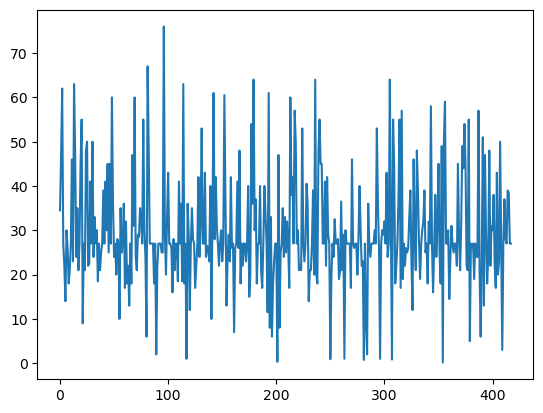

In [238]:
plt.plot(df_test.Age)

In [239]:
df_test["Age"].mean()

29.599282296650717

In [240]:
df_test["Age"].median()

27.0

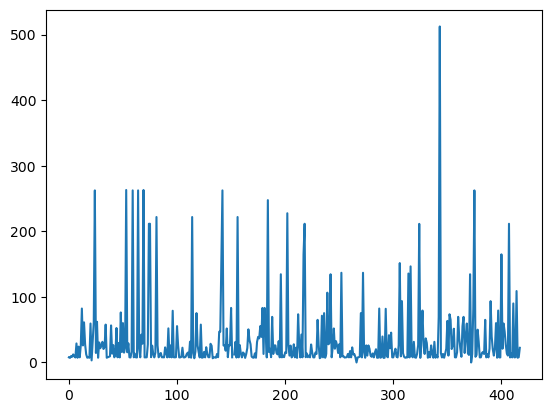

In [242]:
plt.plot(df_test.Fare)

In [257]:
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].median())

In [244]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nameis_missing,Sexis_missing,Ticketis_missing,Cabinis_missing,Embarkedis_missing
0,892,3,207,2,34.5,0,0,153,7.8292,0,2,False,False,False,True,False
1,893,3,404,1,47.0,1,0,222,7.0000,0,3,False,False,False,True,False
2,894,2,270,2,62.0,0,0,74,9.6875,0,2,False,False,False,True,False
3,895,3,409,2,27.0,0,0,148,8.6625,0,3,False,False,False,True,False
4,896,3,179,1,22.0,1,1,139,12.2875,0,3,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,354,2,27.0,0,0,268,8.0500,0,3,False,False,False,True,False
414,1306,1,284,1,39.0,0,0,325,108.9000,23,1,False,False,False,False,False
415,1307,3,333,2,38.5,0,0,347,7.2500,0,3,False,False,False,True,False
416,1308,3,385,2,27.0,0,0,221,8.0500,0,3,False,False,False,True,False


In [245]:
df_test.isna().sum()

PassengerId           0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin                 0
Embarked              0
Nameis_missing        0
Sexis_missing         0
Ticketis_missing      0
Cabinis_missing       0
Embarkedis_missing    0
dtype: int64

In [258]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         418 non-null    int64  
 1   Pclass              418 non-null    int64  
 2   Name                418 non-null    int16  
 3   Sex                 418 non-null    int8   
 4   Age                 418 non-null    float64
 5   SibSp               418 non-null    int64  
 6   Parch               418 non-null    int64  
 7   Ticket              418 non-null    int16  
 8   Fare                418 non-null    float64
 9   Cabin               418 non-null    int8   
 10  Embarked            418 non-null    int8   
 11  Nameis_missing      418 non-null    bool   
 12  Sexis_missing       418 non-null    bool   
 13  Ticketis_missing    418 non-null    bool   
 14  Cabinis_missing     418 non-null    bool   
 15  Embarkedis_missing  418 non-null    bool   
dtypes: bool(

In [261]:
df_test["Age"] = df_test["Age"].astype(int)

In [265]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         418 non-null    int64  
 1   Pclass              418 non-null    int64  
 2   Name                418 non-null    int16  
 3   Sex                 418 non-null    int8   
 4   Age                 418 non-null    int32  
 5   SibSp               418 non-null    int64  
 6   Parch               418 non-null    int64  
 7   Ticket              418 non-null    int16  
 8   Fare                418 non-null    float64
 9   Cabin               418 non-null    int8   
 10  Embarked            418 non-null    int8   
 11  Nameis_missing      418 non-null    bool   
 12  Sexis_missing       418 non-null    bool   
 13  Ticketis_missing    418 non-null    bool   
 14  Cabinis_missing     418 non-null    bool   
 15  Embarkedis_missing  418 non-null    bool   
dtypes: bool(

In [263]:
a = df_test.PassengerId

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Name                891 non-null    int16  
 4   Sex                 891 non-null    int8   
 5   Age                 891 non-null    int32  
 6   SibSp               891 non-null    int64  
 7   Parch               891 non-null    int64  
 8   Ticket              891 non-null    int16  
 9   Fare                891 non-null    float64
 10  Cabin               891 non-null    int8   
 11  Embarked            891 non-null    int8   
 12  Nameis_missing      891 non-null    bool   
 13  Ticketis_missing    891 non-null    bool   
 14  Cabinis_missing     891 non-null    bool   
 15  Embarkedis_missing  891 non-null    bool   
 16  Sexis_mi

In [266]:
b = df_test.Sexis_missing

In [267]:
df_test.drop("Sexis_missing",axis=1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nameis_missing,Ticketis_missing,Cabinis_missing,Embarkedis_missing
0,892,3,207,2,34,0,0,153,7.8292,0,2,False,False,True,False
1,893,3,404,1,47,1,0,222,7.0000,0,3,False,False,True,False
2,894,2,270,2,62,0,0,74,9.6875,0,2,False,False,True,False
3,895,3,409,2,27,0,0,148,8.6625,0,3,False,False,True,False
4,896,3,179,1,22,1,1,139,12.2875,0,3,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,354,2,27,0,0,268,8.0500,0,3,False,False,True,False
414,1306,1,284,1,39,0,0,325,108.9000,23,1,False,False,False,False
415,1307,3,333,2,38,0,0,347,7.2500,0,3,False,False,True,False
416,1308,3,385,2,27,0,0,221,8.0500,0,3,False,False,True,False


In [268]:
df_test["Sex_ismissing"] = b

In [288]:
df_test = df_test.drop("Sexis_missing",axis=1)

In [272]:
df_test = df_test.drop("Sex_ismissing",axis=1)

In [274]:
df_test["Sexis_missing"] = b

In [277]:
df_test.info(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         418 non-null    int64  
 1   Pclass              418 non-null    int64  
 2   Name                418 non-null    int16  
 3   Sex                 418 non-null    int8   
 4   Age                 418 non-null    int32  
 5   SibSp               418 non-null    int64  
 6   Parch               418 non-null    int64  
 7   Ticket              418 non-null    int16  
 8   Fare                418 non-null    float64
 9   Cabin               418 non-null    int8   
 10  Embarked            418 non-null    int8   
 11  Nameis_missing      418 non-null    bool   
 12  Ticketis_missing    418 non-null    bool   
 13  Cabinis_missing     418 non-null    bool   
 14  Embarkedis_missing  418 non-null    bool   
 15  Sexis_missing       418 non-null    bool   
dtypes: bool(

(None, None)

In [290]:
b = rs_log_reg.predict(df_test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nameis_missing,Ticketis_missing,Cabinis_missing,Embarkedis_missing
33,34,2,857,0,66,0,0,550,10,0,3,False,False,True,False
269,270,1,92,1,35,0,0,614,136,90,3,False,False,False,False
212,213,3,650,0,22,0,0,527,7,0,3,False,False,True,False
827,828,2,504,0,1,0,2,619,37,0,1,False,False,True,False
73,74,3,162,0,26,1,0,205,14,0,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,853,3,98,1,9,1,1,204,15,0,1,False,False,True,False
418,419,2,514,0,30,0,0,226,13,0,3,False,False,True,False
587,588,1,268,0,60,1,1,75,79,30,1,False,False,False,False
374,375,3,626,1,3,3,1,396,21,0,3,False,False,True,False


In [285]:
ex = pd.read_csv("test.csv")

In [286]:
ex.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [287]:
ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [120]:
kq = pd.DataFrame({
    'PassengerId': a,
    'Survived': b
})

In [121]:
kq

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [122]:
kq.to_csv("kq.csv",index=False)

In [ ]:
max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 100}

In [296]:
model = RandomForestClassifier(max_depth=10,
                               min_samples_leaf=4,
                               min_samples_split=4,
                               n_estimators=100)

In [119]:
b = model.predict(df_test)

In [304]:
from sklearn.model_selection import GridSearchCV
rf_gird = {"n_estimators":[50,100],
           "max_depth":[None,3,5,10],
           "min_samples_split":[4,8],
           "min_samples_leaf":[4,8]}
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression 
rs_log_reg = GridSearchCV(estimator = RandomForestClassifier(),
                                param_grid=  rf_gird,
                                cv = 5,
                                verbose=True)
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [4, 8],
                         'min_samples_split': [4, 8],
                         'n_estimators': [50, 100]},
             verbose=True)

In [305]:
rs_log_reg.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

In [306]:
b = rs_log_reg.predict(df_test)

In [326]:
kq = pd.DataFrame({
    'PassengerId': a,
    'Survived': b
})

In [327]:
kq.to_csv("kq.csv",index=False)

In [309]:
rs_log_reg.score(X_val,y_val)

0.9106145251396648

In [310]:
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

In [312]:
b = model.predict(df_test)

In [320]:
rf_gird = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

rf_log_reg = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                param_distributions = rf_gird,
                                cv = 5,
                                n_iter=20, # Number of try
                                verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rf_log_reg.fit(X_train,y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [316]:
rf_log_reg.fit(X_val,y_val)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [321]:
rf_log_reg.score(X_train,y_train)

0.9030898876404494

In [318]:
rf_log_reg.best_params_

{'n_estimators': 310,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [319]:
rf_log_reg.score(X_val,y_val)

0.9050279329608939

In [322]:
model = RandomForestClassifier(n_estimators=310,
                               min_samples_leaf=3,
                               min_samples_split=4,
                               max_depth=10)

In [323]:
model.fit(X,y)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=310)

In [324]:
model.score(X_train,y_train)

0.9325842696629213

In [325]:
b = model.predict(df_test)

In [333]:

# Create a pandas Series with categorical data
data = pd.Series(['L','Banana', 'Banana', 'Apple', 'Orange'])

# Convert categorical data to numerical data
data_encoded = data.astype('category').cat.codes

print(data_encoded)

0    2
1    1
2    1
3    0
4    3
dtype: int8


In [335]:
df= pd.read_csv("train.csv")

In [337]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [336]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [339]:
# Turn category into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["Sex","Embarked"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                  categorical_feature)],
                                  remainder="passthrough")
transformer_X = transformer.fit_transform(X)
transformer_X

array([[1.0, 0.0, 0.0, ..., False, True, False],
       [0.0, 1.0, 0.0, ..., False, False, False],
       [0.0, 1.0, 0.0, ..., False, True, False],
       ...,
       [0.0, 1.0, 0.0, ..., False, True, False],
       [1.0, 0.0, 0.0, ..., False, False, False],
       [1.0, 0.0, 0.0, ..., False, True, False]], dtype=object)

In [340]:
pd.DataFrame(transformer_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,0.0,0.0,1.0,1,3,109,22,1,0,524,7,0,False,False,True,False
1,0.0,1.0,0.0,1.0,0.0,0.0,2,1,191,38,1,0,597,71,82,False,False,False,False
2,0.0,1.0,0.0,0.0,0.0,1.0,3,3,354,26,0,0,670,8,0,False,False,True,False
3,0.0,1.0,0.0,0.0,0.0,1.0,4,1,273,35,1,0,50,53,56,False,False,False,False
4,1.0,0.0,0.0,0.0,0.0,1.0,5,3,16,35,0,0,473,8,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,0.0,0.0,0.0,1.0,887,2,549,27,0,0,102,13,0,False,False,True,False
887,0.0,1.0,0.0,0.0,0.0,1.0,888,1,304,19,0,0,15,30,31,False,False,False,False
888,0.0,1.0,0.0,0.0,0.0,1.0,889,3,414,28,1,2,676,23,0,False,False,True,False
889,1.0,0.0,0.0,1.0,0.0,0.0,890,1,82,26,0,0,9,30,61,False,False,False,False


In [341]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        imputer = SimpleImputer(strategy="mean")
        X["Age"] = imputer.fit_transform(X[["Age"]])
        return X

In [5]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()
        
        column_name = ["C","S","Q","N"]
        
        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
        
        column_name = ["Female","Male"]
        
        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
    
        return X

In [6]:
class FeatureDrop(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1)
    

In [7]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer",AgeImputer()),
                     ("featureEncoder",FeatureEncoder()),
                     ("featuredrop",FeatureDrop())])

In [8]:
df = pipeline.fit_transform(X=df)

In [9]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
C              0
S              0
Q              0
Female         0
Male           0
dtype: int64

In [11]:
df = df.drop("PassengerId",axis=1)

In [370]:
model = RandomForestClassifier()

In [374]:
X = df.drop("Survived",axis=1)
y = df["Survived"]
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)

In [375]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [376]:
model.score(X_val,y_val)

0.8268156424581006

In [378]:
grid = {
    "n_estimators":[10,100,200,500],
    "max_depth":[None,5,10],
    "min_samples_split":[2,3,4]
}
grid_search = GridSearchCV(model, grid, cv = 5, scoring="accuracy",return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [379]:
grid_search.score(X_val,y_val)

0.8379888268156425

In [380]:
the_best = grid_search.best_params_

In [383]:
the_best = RandomForestClassifier(max_depth = 10, min_samples_split = 3, n_estimators = 200)

In [384]:
grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [386]:
the_best.fit(X_train,y_train)
the_best.score(X_val,y_val)

0.8379888268156425

In [13]:
df_test = pd.read_csv("test.csv")

In [388]:
df_test = pipeline.fit_transform(df_test)

KeyError: "['N'] not found in axis"

In [389]:
pipeline

Pipeline(steps=[('ageimputer', AgeImputer()),
                ('featureEncoder', FeatureEncoder()),
                ('featuredrop', FeatureDrop())])

In [390]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
C                0
S                0
Q                0
Female           0
Male             0
dtype: int64

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        imputer = SimpleImputer(strategy="mean")
        X["Fare"] = imputer.fit_transform(X[["Fare"]])
        return X

In [15]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()
        
        column_name = ["C","S","Q"]
        
        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
        
        column_name = ["Female","Male"]
        
        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
    
        return X

In [16]:
class FeatureDrop(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex"],axis=1)

In [17]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer",AgeImputer()),
                     ("featureEncoder",FeatureEncoder()),
                     ("featuredrop",FeatureDrop())])

In [18]:
df_test = pipeline.fit_transform(df_test)

In [398]:
df_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [399]:
a = df_test.PassengerId

In [401]:
b = model.predict(df_test)

In [82]:
kq = pd.DataFrame({
    'PassengerId': a,
    'Survived': b
})

In [83]:
kq.to_csv("kq.csv",index=False)

In [1]:
im

NameError: name 'df' is not defined

In [12]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [19]:
X = df.drop("Survived",axis=1)
y = df["Survived"]
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
model = RandomForestClassifier()
grid = {
    "n_estimators":[10,100,200,500],
    "max_depth":[None,5,10],
    "min_samples_split":[2,3,4]
}
grid_search = GridSearchCV(model, grid, cv = 5, scoring="accuracy",return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [25]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}

In [26]:
model = RandomForestClassifier(max_depth = 5, min_samples_split = 2, n_estimators = 200)

In [30]:
model.fit(X,y)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [32]:
model.score(X_train,y_train)

0.8525280898876404

In [29]:
X

,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [33]:
df_test = pd.read_csv("test.csv")

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        imputer = SimpleImputer(strategy="mean")
        X["Age"] = imputer.fit_transform(X[["Age"]])
        return X
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()
        
        column_name = ["C","S","Q","N"]
        
        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
        
        column_name = ["Female","Male"]
        
        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
    
        return X

class FeatureDrop(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1)

from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer",AgeImputer()),
                     ("featureEncoder",FeatureEncoder()),
                     ("featuredrop",FeatureDrop())])

In [37]:
df = pd.read_csv("train.csv")
df = pipeline.fit_transform(df)

In [39]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
C              0
S              0
Q              0
Female         0
Male           0
dtype: int64

In [40]:
X = df.drop("Survived",axis=1)
y = df.Survived

In [43]:
X = X.drop("PassengerId",axis=1)

KeyError: "['PassengerId'] not found in axis"

In [45]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)

In [46]:
model

RandomForestClassifier(max_depth=5, n_estimators=200)

In [49]:
model.fit(X,y)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [51]:
model.score(X_train,y_train)

0.8525280898876404

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer_test(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        imputer = SimpleImputer(strategy="mean")
        X["Fare"] = imputer.fit_transform(X[["Fare"]])
        X["Age"] = imputer.fit_transform(X[["Age"]])
        return X
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder_test(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()
        
        column_name = ["C","S","Q"]
        
        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
        
        column_name = ["Female","Male"]
        
        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
    
        return X

class FeatureDrop_test(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex"],axis=1)

from sklearn.pipeline import Pipeline

pipeline_test = Pipeline([("ageimputer_test",AgeImputer_test()),
                     ("featureEncoder_test",FeatureEncoder_test()),
                     ("featuredrop_test",FeatureDrop_test())])

In [80]:
df_test = pd.read_csv("test.csv")
a = df_test.PassengerId

In [61]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [73]:
df_test = pipeline_test.fit_transform(df_test)

In [95]:
df_test.drop("PassengerId",axis=1,inplace=True)
df_test.drop("Fare",axis=1,inplace=True)

In [76]:
df_test

,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [77]:
model

RandomForestClassifier(max_depth=5, n_estimators=200)

In [110]:
b = model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Cabin
- Embarked
- Name
- Sex
- Ticket
Feature names seen at fit time, yet now missing:
- C
- Female
- Male
- Q
- S


In [79]:
b

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [81]:
a

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [91]:
df = pd.read_csv("train.csv")

In [85]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
df = pipeline.fit_transform(df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15428\747310510.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="YlGnBu")


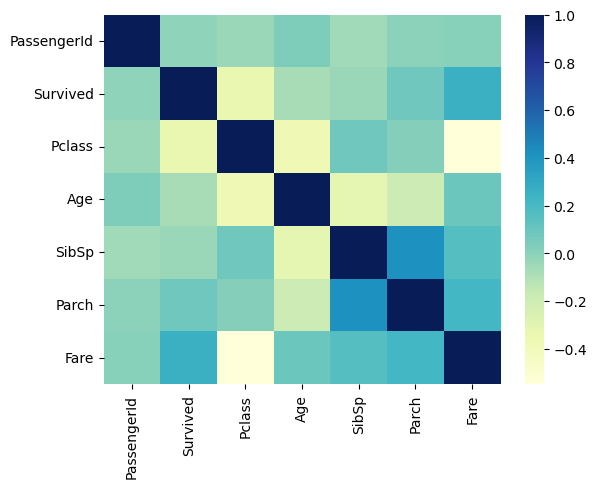

In [93]:
import seaborn as sns

sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()

In [114]:
df_test = pd.read_csv("test.csv")
df_test = pipeline_test.fit_transform(df_test)

In [99]:
df = pd.read_csv("train.csv")
df = pipeline.fit_transform(df)

In [104]:
X = df.drop("Survived",axis=1)
y = df["Survived"]
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)

In [105]:
X_train

,Pclass,Age,SibSp,Parch,C,S,Q,Female,Male
220,3,16.000000,0,0,0.0,0.0,1.0,0.0,1.0
229,3,29.699118,3,1,0.0,0.0,1.0,1.0,0.0
283,3,19.000000,0,0,0.0,0.0,1.0,0.0,1.0
221,2,27.000000,0,0,0.0,0.0,1.0,0.0,1.0
552,3,29.699118,0,0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
366,1,60.000000,1,0,1.0,0.0,0.0,1.0,0.0
660,1,50.000000,2,0,0.0,0.0,1.0,0.0,1.0
46,3,29.699118,1,0,0.0,1.0,0.0,0.0,1.0
127,3,24.000000,0,0,0.0,0.0,1.0,0.0,1.0


In [103]:
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Fare",axis=1,inplace=True)

In [108]:
model.fit(X,y)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [109]:
model.score(X_val,y_val)

0.8435754189944135

In [115]:
df_test.drop("PassengerId",axis=1,inplace=True)
df_test.drop("Fare",axis=1,inplace=True)

In [116]:
df_test

,Pclass,Age,SibSp,Parch,C,S,Q,Female,Male
0,3,34.50000,0,0,0.0,1.0,0.0,0.0,1.0
1,3,47.00000,1,0,0.0,0.0,1.0,1.0,0.0
2,2,62.00000,0,0,0.0,1.0,0.0,0.0,1.0
3,3,27.00000,0,0,0.0,0.0,1.0,0.0,1.0
4,3,22.00000,1,1,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,0.0,0.0,1.0,0.0,1.0
414,1,39.00000,0,0,1.0,0.0,0.0,1.0,0.0
415,3,38.50000,0,0,0.0,0.0,1.0,0.0,1.0
416,3,30.27259,0,0,0.0,0.0,1.0,0.0,1.0


In [118]:
model.fit(X,y)

RandomForestClassifier(max_depth=5, n_estimators=200)